#### Importing Essential Libraries and Modules

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import hashlib
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import string
import nltk
import nltk
from nltk.tokenize import word_tokenize
from sklearn.utils import resample
import joblib
from sklearn.model_selection import learning_curve
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import pearsonr
from sklearn.metrics import ConfusionMatrixDisplay

#### Reading the Dataset

In [3]:
main_dataset=pd.read_csv(r"C:\Users\moham\Downloads\yelp_review.csv\yelp_review.csv")
main_dataset.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


#### Taking 10 percent of the dataset randomly 

In [4]:
df = main_dataset.sample(frac=0.1, random_state=42)
print("Dataset Shape:", df.shape)

Dataset Shape: (526167, 9)


#### Exploring the dataset info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526167 entries, 4528116 to 4289070
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    526167 non-null  object
 1   user_id      526167 non-null  object
 2   business_id  526167 non-null  object
 3   stars        526167 non-null  int64 
 4   date         526167 non-null  object
 5   text         526167 non-null  object
 6   useful       526167 non-null  int64 
 7   funny        526167 non-null  int64 
 8   cool         526167 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 40.1+ MB


#### Checking duplicates in the dataset

In [6]:
print("Dataset duplicate:", sum(df.duplicated()))

Dataset duplicate: 0


#### Checking for missing values in the dataset

In [7]:
print("Dataset Missing Values:")
print(df.isnull().sum())

Dataset Missing Values:
review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64


#### Date Column Conversion

In [8]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


#### Extracting Year, Month, and Day

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526167 entries, 4528116 to 4289070
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    526167 non-null  object        
 1   user_id      526167 non-null  object        
 2   business_id  526167 non-null  object        
 3   stars        526167 non-null  int64         
 4   date         526167 non-null  datetime64[ns]
 5   text         526167 non-null  object        
 6   useful       526167 non-null  int64         
 7   funny        526167 non-null  int64         
 8   cool         526167 non-null  int64         
 9   year         526167 non-null  int64         
 10  month        526167 non-null  int64         
 11  day          526167 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 52.2+ MB


#### Review Count Analysis Across Years

In [11]:
reviews_per_year = df.groupby('year')['review_id'].count().reset_index()
reviews_per_year = reviews_per_year.sort_values(by='year', ascending=False)
reviews_per_year

,year,review_id
13,2017,112848
12,2016,105050
11,2015,90864
10,2014,67928
9,2013,47225
8,2012,35057
7,2011,29519
6,2010,18746
5,2009,9824
4,2008,6156


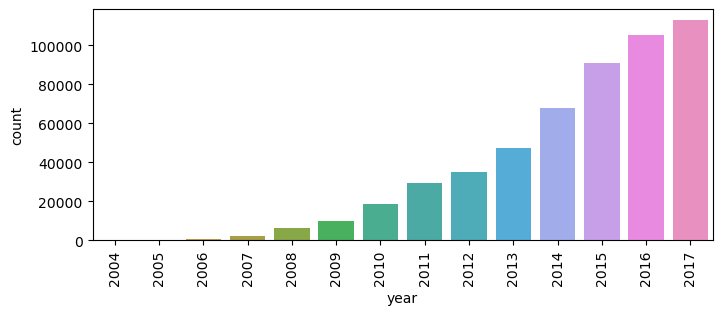

In [12]:
plt.subplots(figsize=(8,3))
sns.countplot(x='year', data=df)
plt.xticks(rotation=90)
plt.show()

#### Creating a new column in the dataset for the number of words in the review

In [13]:
df['text_length'] = df['text'].apply(len)
df.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,year,month,day,text_length
4528116,m5jjU8KhAPmDSa5BIopIqw,F9vYcUknd9JY2lxsaEObQQ,T6ihfy4SYiF4PvuE6Y0VPA,3,2015-01-29,Airport Wendy's. You curbed my hunger. That wa...,1,2,2,2015,1,29,690
3097267,pCURaqs8o9kCOl6fEVcsKA,H5d_nFqzwrREE-YduK2ABg,fPpO5751xJI78__uTU2q7g,5,2008-01-13,I stumbled across this store on my way to Nest...,19,6,13,2008,1,13,545
2290314,2C8Gr_EX_gVTlJsobcey6w,xycmBfvZtDX9Bao9kwNQCw,sdE4iWulUozJXOxzQ5Bjhw,3,2016-05-22,Pizza was decent. Very disappointed in the del...,0,3,0,2016,5,22,270


#### Compare text length to stars

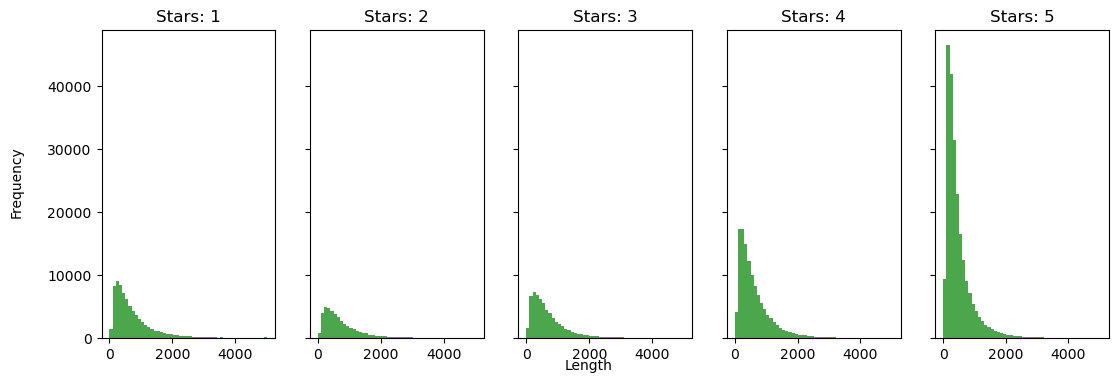

In [14]:
stars_values = sorted(df['stars'].unique())

fig, axes = plt.subplots(nrows=1, ncols=len(stars_values), figsize=(13,4), sharey=True)

for i, stars_value in enumerate(stars_values):
    subset_data = df[df['stars'] == stars_value]
    axes[i].hist(subset_data['text_length'], bins=50, color='green', alpha=0.7)
    axes[i].set_title(f'Stars: {stars_value}')

fig.text(0.5, 0.04, 'Length', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

plt.show()

###### The graph indicates a notable predominance of 5-star ratings (40,000+ instances) and significant frequency in 4-star ratings (nearly 20,000). While 1-star and 3-star ratings hover around 10,000, 2-star ratings fall slightly below.

#### Creating a new column in the dataset for the number of reviews per user

In [15]:
user_reviews_count = df['user_id'].value_counts().reset_index()
user_reviews_count.columns = ['user_id', 'review_count']
user_reviews_count = user_reviews_count.sort_values(by='review_count', ascending=False).reset_index(drop=True)
user_reviews_count.head(10)

,user_id,review_count
0,CxDOIDnH8gp9KXzpBHJYXw,379
1,bLbSNkLggFnqwNNzzq-Ijw,220
2,PKEzKWv_FktMm2mGPjwd0Q,155
3,DK57YibC5ShBmqQl97CKog,136
4,QJI9OSEn6ujRCtrX06vs1w,132
5,U4INQZOPSUaj8hMjLlZ3KA,129
6,d_TBs6J3twMy9GChqUEXkg,127
7,UYcmGbelzRa0Q6JqzLoguw,120
8,hWDybu_KvYLSdEFzGrniTw,117
9,ELcQDlf69kb-ihJfxZyL0A,112


In [16]:
df = pd.merge(df, user_reviews_count, on='user_id', how='left')
df.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,year,month,day,text_length,review_count
0,m5jjU8KhAPmDSa5BIopIqw,F9vYcUknd9JY2lxsaEObQQ,T6ihfy4SYiF4PvuE6Y0VPA,3,2015-01-29,Airport Wendy's. You curbed my hunger. That wa...,1,2,2,2015,1,29,690,1
1,pCURaqs8o9kCOl6fEVcsKA,H5d_nFqzwrREE-YduK2ABg,fPpO5751xJI78__uTU2q7g,5,2008-01-13,I stumbled across this store on my way to Nest...,19,6,13,2008,1,13,545,24
2,2C8Gr_EX_gVTlJsobcey6w,xycmBfvZtDX9Bao9kwNQCw,sdE4iWulUozJXOxzQ5Bjhw,3,2016-05-22,Pizza was decent. Very disappointed in the del...,0,3,0,2016,5,22,270,1


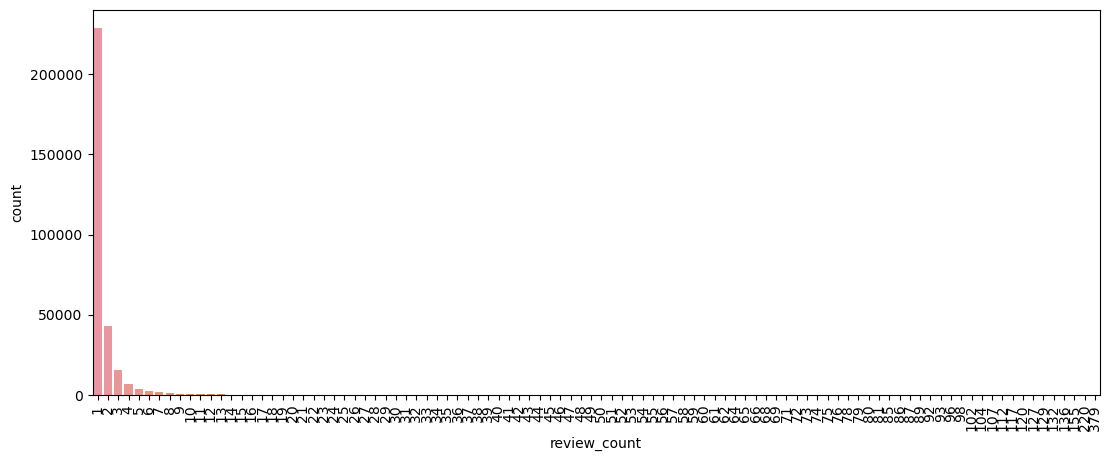

In [17]:
plt.subplots(figsize=(13,5))
sns.countplot(x='review_count', data=user_reviews_count)
plt.xticks(rotation=90)
plt.show()

#### The examination of user review counts reveals a notable concentration wherein a substantial majority of users contribute a singular review. Additionally, the decline in frequency is discernible, with limited visibility to users generating more than eight reviews, owing to the chosen scale for the graphical representation. To refine the approach, the author proposes considering outliers as users who contribute a number of reviews equal to or exceeding the median plus five standard deviations. This selection is characterized by a deliberately conservative criterion, aiming to identify users whose review activity markedly deviates from the central tendency of the distribution.


#### User Reviews Count Statistics and Outlier Threshold Analysis

In [18]:
median = user_reviews_count.review_count.median()
mean   = user_reviews_count.review_count.mean()
devstd = user_reviews_count.review_count.std()
threshold_review_count = int(median + 5*devstd)
print("""Median: %.2f
Mean: %.2f
Std dev: %.2f
Threshold: %.2f""" %(median, mean, devstd, threshold_review_count))

Median: 1.00
Mean: 1.71
Std dev: 2.74
Threshold: 14.00


#### The analysis of the user review counts indicates a median of 1, a mean of 1.71, and a standard deviation of 2.74. The threshold of 14 is calculated using a statistical method known as the "five times the standard deviation rule." This approach involves adding five times the standard deviation to the median, resulting in a threshold beyond which data points are considered potential outliers. Statistics experts use this method to systematically identify extreme values in a dataset, providing a robust and standardized way to detect potential anomalies or deviations from the norm. It offers a balance between sensitivity to outliers and maintaining statistical rigor in the analysis.

In [19]:
users_over_threshold = user_reviews_count[user_reviews_count['review_count'] >= threshold_review_count]
users_under_threshold = user_reviews_count[user_reviews_count['review_count'] < threshold_review_count]

print("Number of users over the threshold:", len(users_over_threshold))
print("Number of users under the threshold:", len(users_under_threshold))

Number of users over the threshold: 2185
Number of users under the threshold: 306030


In [20]:
reviews_over_threshold = user_reviews_count[user_reviews_count['review_count'] >= threshold_review_count]['review_count']
reviews_under_threshold = user_reviews_count[user_reviews_count['review_count'] < threshold_review_count]['review_count']

print("Number of reviews for users over the threshold:", reviews_over_threshold.sum())
print("Number of reviews for users under the threshold:", reviews_under_threshold.sum())

Number of reviews for users over the threshold: 53308
Number of reviews for users under the threshold: 472859


#### This dichotomy in user and review distribution raises considerations about potential anomalies. For instance, the identification of approximately 2,185 (0.71%) of users producing 53,308 (10%) of the reviews hints at a conservative estimate that may indicate suspicious reviewing behavior, warranting further scrutiny for potential instances of fake reviews within the dataset.

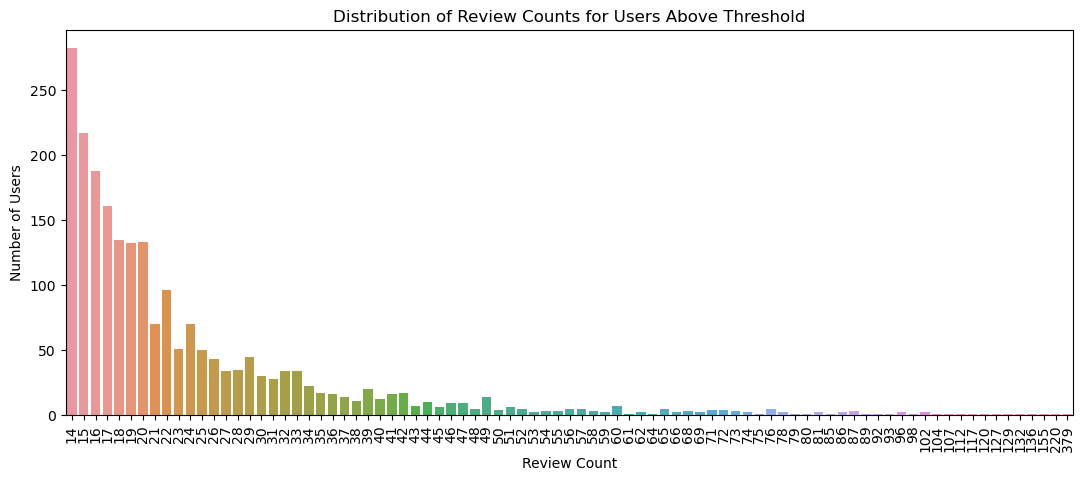

In [21]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.countplot(x='review_count', data=users_over_threshold, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Review Count')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Review Counts for Users Above Threshold')

plt.show()

#### Comparison between text length for users over and under threshold

In [22]:
high_review_users = user_reviews_count[user_reviews_count['review_count'] >= threshold_review_count]['user_id'].unique()
high_review_df = df[df['user_id'].isin(high_review_users)]
high_review_df['text_length'] = high_review_df['text'].apply(len)

regular_review_users = user_reviews_count[user_reviews_count['review_count'] < threshold_review_count]['user_id'].unique()
regular_review_df = df[df['user_id'].isin(regular_review_users)]
regular_review_df['text_length'] = regular_review_df['text'].apply(len)

mean_length_whole_dataset = df['text_length'].mean()
print(f"Mean Length for the Whole Dataset: {mean_length_whole_dataset:.2f}")
median_length_whole_dataset = df['text_length'].median()
print(f"Median Length for the Whole Dataset: {median_length_whole_dataset:.2f}")
print('-' * 110)
print('-' * 110)
mean_length_under_threshold = regular_review_df['text_length'].mean()
print(f"Mean Length for Reviews by Users with under than {threshold_review_count} Reviews: {mean_length_under_threshold:.2f}")
median_length_under_threshold = regular_review_df['text_length'].median()
print(f"Median Length for Reviews by Users with under than {threshold_review_count} Reviews: {median_length_under_threshold:.2f}")
print('-' * 110)
print('-' * 110)
mean_length_over_threshold = high_review_df['text_length'].mean()
print(f"Mean Length for Reviews by Users with {threshold_review_count} or More Reviews: {mean_length_over_threshold:.2f}")
median_length_over_threshold = high_review_df['text_length'].median()
print(f"Median Length for Reviews by Users with {threshold_review_count} or More Reviews: {median_length_over_threshold:.2f}")

Mean Length for the Whole Dataset: 611.07
Median Length for the Whole Dataset: 433.00
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Mean Length for Reviews by Users with under than 14 Reviews: 579.73
Median Length for Reviews by Users with under than 14 Reviews: 408.00
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Mean Length for Reviews by Users with 14 or More Reviews: 889.08
Median Length for Reviews by Users with 14 or More Reviews: 718.00


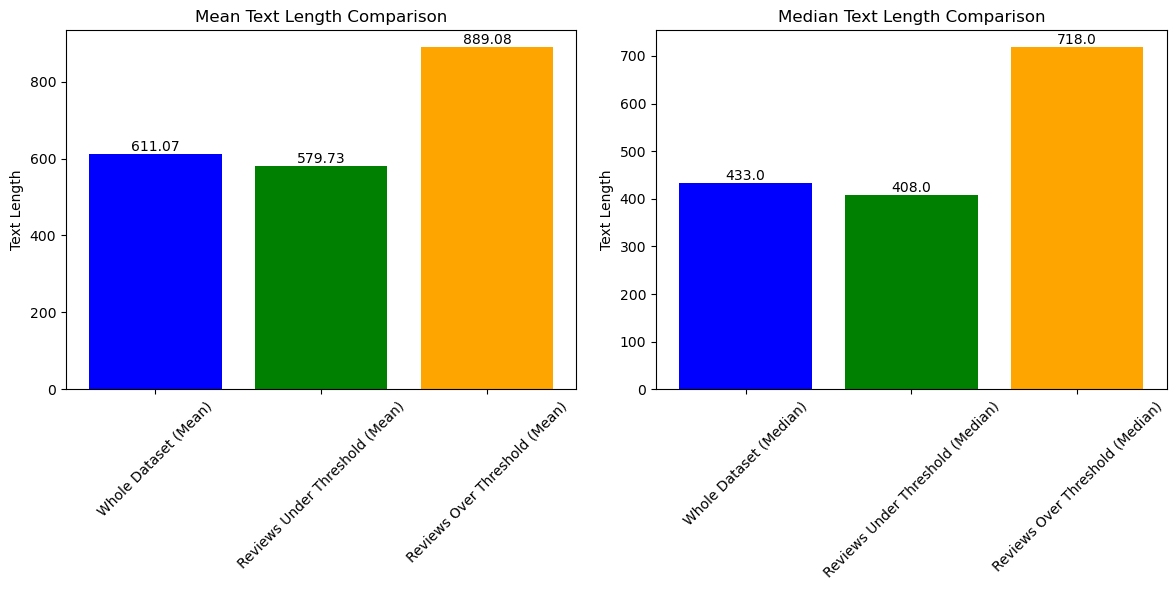

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
mean_bars = ax[0].bar(['Whole Dataset (Mean)', 'Reviews Under Threshold (Mean)', 'Reviews Over Threshold (Mean)'],
                      [mean_length_whole_dataset, mean_length_under_threshold, mean_length_over_threshold],
                      color=['blue', 'green', 'orange'])
ax[0].set_ylabel('Text Length')
ax[0].set_title('Mean Text Length Comparison')
ax[0].tick_params(axis='x', rotation=45, labelrotation=45)  
for bar in mean_bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

median_bars = ax[1].bar(['Whole Dataset (Median)', 'Reviews Under Threshold (Median)', 'Reviews Over Threshold (Median)'],
                        [median_length_whole_dataset, median_length_under_threshold, median_length_over_threshold],
                        color=['blue', 'green', 'orange'])
ax[1].set_ylabel('Text Length')
ax[1].set_title('Median Text Length Comparison')
ax[1].tick_params(axis='x', rotation=45, labelrotation=45)  

for bar in median_bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### The analysis of review text lengths in the dataset reveals distinctions based on user review counts. The mean review length for the entire dataset is 611.07 characters, with a median of 433.00 characters. Users with review counts under the threshold of 14 exhibit slightly shorter mean reviews of 579.73 characters and a median of 408.00 characters. In contrast, prolific reviewers, surpassing the threshold, contribute longer reviews, with a mean of 889.08 characters and a median of 718.00 characters. This pattern accentuates the differential reviewing behaviors among users with varying review counts. 
#### The examination of review text lengths within the dataset, coupled with prior analyses on user review counts, accentuates uncertainties surrounding user behavior. Users surpassing the established review count threshold exhibit distinct reviewing patterns, characterized by longer mean and median review lengths. This pattern raises questions about the authenticity of reviews and further underscores suspicions initially identified in the analysis of user and review distribution. The convergence of these findings invites a more detailed examination into the reviewing behaviors of users exceeding the established threshold, as their contribution disproportionately influences the overall review landscape. These nuanced observations collectively warrant a comprehensive investigation into potential anomalies or fabricated reviews within the dataset.

#### Correlation 

In [24]:
high_review_df_corr = high_review_df.groupby('stars').mean()
high_review_df_corr

,useful,funny,cool,year,month,day,text_length,review_count
stars,,,,,,,,
1,4.837559,2.474643,1.382726,2013.417591,6.459192,15.594295,994.448494,28.916799
2,3.312628,1.843482,1.367184,2013.183694,6.510012,15.655497,994.916428,36.540866
3,2.594781,1.311915,1.538159,2013.220663,6.507057,15.693419,894.193993,42.616363
4,2.991757,1.455076,2.133038,2013.341512,6.460764,15.700713,870.350525,36.440326
5,3.627952,1.669548,2.513737,2013.646705,6.507177,15.738308,853.753203,29.793101


In [25]:
regular_review_df_corr = regular_review_df.groupby('stars').mean()
regular_review_df_corr

,useful,funny,cool,year,month,day,text_length,review_count
stars,,,,,,,,
1,2.140685,0.644177,0.239613,2014.971309,6.632726,15.731204,751.563725,2.108960
2,1.423771,0.535312,0.310181,2014.347258,6.560402,15.678143,737.276997,2.901043
3,1.017405,0.431657,0.422357,2014.061110,6.501661,15.752624,667.116850,3.622665
4,1.007608,0.374956,0.550165,2014.036278,6.485670,15.709067,584.527853,3.450829
5,0.948776,0.279161,0.453333,2014.919745,6.575985,15.775980,470.840908,2.404357


In [26]:
high_review_df_corr.corr()

,useful,funny,cool,year,month,day,text_length,review_count
useful,1.000000,0.962989,-0.182800,0.448233,-0.482913,-0.675396,0.539674,-0.871714
funny,0.962989,1.000000,-0.413821,0.205478,-0.433069,-0.821254,0.745844,-0.747216
cool,-0.182800,-0.413821,1.000000,0.759701,0.040241,0.815811,-0.860660,-0.292375
year,0.448233,0.205478,0.759701,1.000000,-0.113043,0.344841,-0.464209,-0.770926
month,-0.482913,-0.433069,0.040241,-0.113043,1.000000,0.478721,-0.126533,0.363709
day,-0.675396,-0.821254,0.815811,0.344841,0.478721,1.000000,-0.901266,0.252426
text_length,0.539674,0.745844,-0.860660,-0.464209,-0.126533,-0.901266,1.000000,-0.168907
review_count,-0.871714,-0.747216,-0.292375,-0.770926,0.363709,0.252426,-0.168907,1.000000


In [27]:
regular_review_df_corr.corr()

,useful,funny,cool,year,month,day,text_length,review_count
useful,1.000000,0.916796,-0.875205,0.537859,0.788751,-0.285985,0.741519,-0.653670
funny,0.916796,1.000000,-0.861763,0.195147,0.541896,-0.506877,0.947524,-0.334699
cool,-0.875205,-0.861763,1.000000,-0.540472,-0.811959,0.230373,-0.761648,0.626396
year,0.537859,0.195147,-0.540472,1.000000,0.923973,0.398969,-0.090228,-0.975957
month,0.788751,0.541896,-0.811959,0.923973,1.000000,0.112378,0.292358,-0.961250
day,-0.285985,-0.506877,0.230373,0.398969,0.112378,1.000000,-0.617016,-0.192137
text_length,0.741519,0.947524,-0.761648,-0.090228,0.292358,-0.617016,1.000000,-0.050197
review_count,-0.653670,-0.334699,0.626396,-0.975957,-0.961250,-0.192137,-0.050197,1.000000


#### Creat Text Sentiment column:

##### Text sentiment analysis involves computationally assessing the emotional tone (positivity, neutrality, or negativity) expressed in textual content.

In [28]:
df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity).round(2)
scaler = MinMaxScaler(feature_range=(0, 1))
df['text_sentiment'] = scaler.fit_transform(df['text_sentiment'].values.reshape(-1, 1)).flatten()
df['text_sentiment'].unique()

array([0.535, 0.625, 0.325, 0.565, 0.65 , 0.735, 0.55 , 0.695, 0.515,
       0.94 , 0.585, 0.15 , 0.635, 0.66 , 0.58 , 0.435, 0.505, 0.575,
       0.445, 0.63 , 0.52 , 0.57 , 0.47 , 0.29 , 0.595, 0.485, 0.6  ,
       0.525, 0.77 , 0.62 , 0.725, 0.675, 0.715, 0.605, 0.795, 0.665,
       0.68 , 0.49 , 0.5  , 0.56 , 0.775, 0.405, 0.475, 0.76 , 0.81 ,
       0.51 , 0.59 , 0.365, 0.71 , 0.61 , 0.64 , 0.   , 0.495, 0.615,
       0.7  , 0.745, 0.73 , 0.705, 0.54 , 0.655, 0.67 , 0.555, 0.69 ,
       0.45 , 0.685, 0.53 , 0.37 , 0.44 , 0.415, 0.845, 0.815, 0.35 ,
       0.72 , 0.43 , 0.875, 0.765, 0.46 , 0.305, 1.   , 0.645, 0.39 ,
       0.82 , 0.85 , 0.545, 0.95 , 0.825, 0.38 , 0.41 , 0.165, 0.885,
       0.48 , 0.75 , 0.79 , 0.78 , 0.92 , 0.2  , 0.86 , 0.805, 0.785,
       0.74 , 0.835, 0.9  , 0.8  , 0.855, 0.965, 0.455, 0.83 , 0.395,
       0.42 , 0.425, 0.87 , 0.355, 0.755, 0.91 , 0.925, 0.25 , 0.865,
       0.465, 0.4  , 0.285, 0.375, 0.915, 0.97 , 0.28 , 0.345, 0.385,
       0.84 , 0.21 ,

#### Create target variable Potential Fake :


##### Set the threshold for text sentiment range & adjustment to include both low and high scores


In [29]:
threshold_low_text_sentiment = df['text_sentiment'].quantile(0.05)
threshold_high_text_sentiment = df['text_sentiment'].quantile(0.95)

##### Strategically Defining Conditions:


In [30]:
df['fake_review'] = (
    (df['review_count'] >= threshold_review_count) |
    ((df['text_sentiment'] <= threshold_low_text_sentiment) |
     (df['text_sentiment'] >= threshold_high_text_sentiment))
)

##### Thresholds and the number of potential users writing fake reviews


In [31]:
print(f"Threshold for low text_sentiment (5th percentile): {threshold_low_text_sentiment}")
print(f"Threshold for high text_sentiment (95th percentile): {threshold_high_text_sentiment}")
print(f"Threshold for review_count (95th percentile): {threshold_review_count}")
print('-' * 80)

Threshold for low text_sentiment (5th percentile): 0.435
Threshold for high text_sentiment (95th percentile): 0.8
Threshold for review_count (95th percentile): 14
--------------------------------------------------------------------------------


###### Thresholds for categorizing user behavior are defined based on percentiles: low text sentiment is below 0.435 (5th percentile), high text sentiment is above 0.8 (95th percentile), and a high review count is considered at 14 (95th percentile).


##### Number of unique users for each condition


In [32]:
num_users_condition_low_text_sentiment = df[df['text_sentiment'] <= threshold_low_text_sentiment]['user_id'].nunique()
num_users_condition_high_text_sentiment = df[df['text_sentiment'] >= threshold_high_text_sentiment]['user_id'].nunique()
num_users_condition_review_count = df[df['review_count'] >= threshold_review_count]['user_id'].nunique()
print(f"Number of users with low text_sentiment: {num_users_condition_low_text_sentiment}")
print(f"Number of users with high text_sentiment: {num_users_condition_high_text_sentiment}")
print(f"Number of users with review_count >= {threshold_review_count}: {num_users_condition_review_count}")
print('-' * 80)

Number of users with low text_sentiment: 25140
Number of users with high text_sentiment: 27153
Number of users with review_count >= 14: 2185
--------------------------------------------------------------------------------


##### Overall number of unique users writing potentially fake reviews

In [33]:
num_users_fake_reviews = df[df['fake_review']]['user_id'].nunique()
print(f"Overall number of users writing potentially fake reviews: {num_users_fake_reviews}")
print('-' * 80)

Overall number of users writing potentially fake reviews: 52040
--------------------------------------------------------------------------------


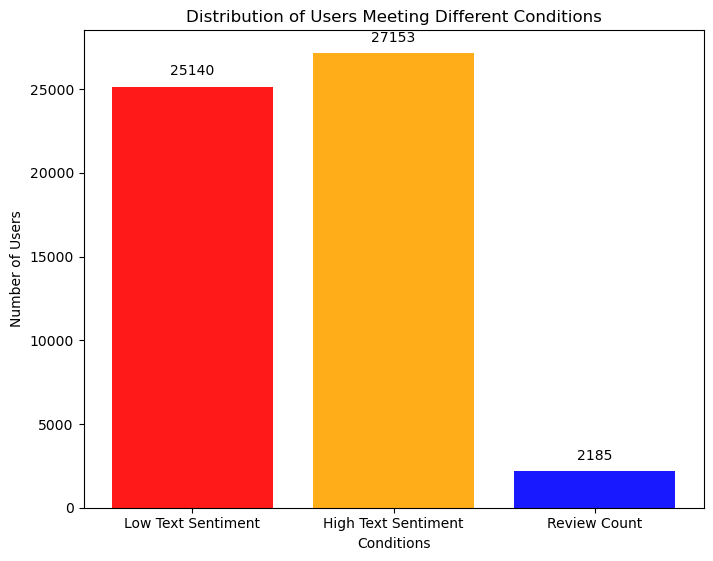

In [34]:
plt.figure(figsize=(8, 6.2))
bar_heights = [num_users_condition_low_text_sentiment, num_users_condition_high_text_sentiment,
               num_users_condition_review_count]
bar_labels = ['Low Text Sentiment', 'High Text Sentiment', 'Review Count']
bars = plt.bar(bar_labels, bar_heights, color=['red', 'orange', 'blue'], alpha=0.9)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500, str(int(bar.get_height())), ha='center', va='bottom')
plt.xlabel('Conditions')
plt.ylabel('Number of Users')
plt.title('Distribution of Users Meeting Different Conditions')
plt.show()

##### Users are stratified using these thresholds: 25,140 show low text sentiment, 27,153 exhibit high text sentiment, and 2,185 have a review count of 14 or more. Overall, 52,040 users are identified as potentially generating fake reviews.


##### Number of reviews for each condition


In [35]:
num_reviews_condition_low_text_sentiment = (df['text_sentiment'] <= threshold_low_text_sentiment).sum()
num_reviews_condition_high_text_sentiment = (df['text_sentiment'] >= threshold_high_text_sentiment).sum()
num_reviews_condition_review_count = (df['review_count'] >= threshold_review_count).sum()
print(f"Number of reviews with low text_sentiment: {num_reviews_condition_low_text_sentiment}")
print(f"Number of reviews with high text_sentiment: {num_reviews_condition_high_text_sentiment}")
print(f"Number of reviews with review_count >= {threshold_review_count}: {num_reviews_condition_review_count}")
print('-' * 80)

Number of reviews with low text_sentiment: 26611
Number of reviews with high text_sentiment: 28793
Number of reviews with review_count >= 14: 53308
--------------------------------------------------------------------------------


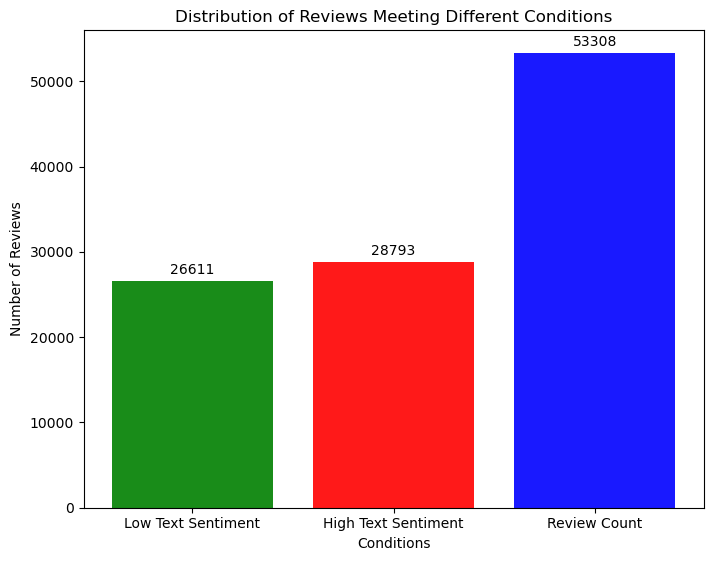

In [36]:
plt.figure(figsize=(8, 6.2))
bar_heights_reviews = [num_reviews_condition_low_text_sentiment, num_reviews_condition_high_text_sentiment,
                       num_reviews_condition_review_count]
bar_labels_reviews = ['Low Text Sentiment', 'High Text Sentiment', 'Review Count']
bars_reviews = plt.bar(bar_labels_reviews, bar_heights_reviews, color=['green', 'red', 'blue'], alpha=0.9)
for bar_review in bars_reviews:
    plt.text(bar_review.get_x() + bar_review.get_width() / 2, bar_review.get_height() + 500, str(int(bar_review.get_height())),
             ha='center', va='bottom')
plt.xlabel('Conditions')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews Meeting Different Conditions')
plt.show()

##### Exploring Distribution & Counts Based on Fake Review Conditions


In [37]:
condition_counts = df.groupby('fake_review').size()
print(condition_counts)
print('-' * 80)
total_fake_users = df['fake_review'].sum()
print(f"Total number of potentially fake reviews: {total_fake_users}")
print('-' * 80)

fake_review
False    419419
True     106748
dtype: int64
--------------------------------------------------------------------------------
Total number of potentially fake reviews: 106748
--------------------------------------------------------------------------------


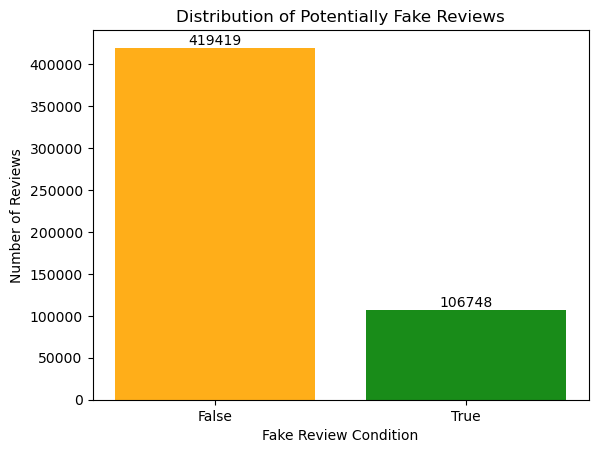

In [38]:
bars = plt.bar(condition_counts.index.astype(str), condition_counts.values, color=['orange', 'green'], alpha=0.9)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500, str(int(bar.get_height())), ha='center', va='bottom')
plt.xlabel('Fake Review Condition')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Potentially Fake Reviews')
plt.xticks(rotation=0)
plt.show()

#### Unraveling User Engagement: Insights from Online Review Text through Feature Engineering

In [39]:
stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [40]:
all_reviews = df['processed_text'].tolist()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_reviews)

word_freq_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())
word_counts = word_freq_df.sum()
most_frequent_words = word_counts.sort_values(ascending=False).head(20)
most_frequent_words

place         290437
food          270217
good          264439
great         229614
time          226783
service       195897
like          191588
really        137742
got           105783
nice           99101
restaurant     96404
best           92647
come           91445
order          88011
love           87259
price          84380
make           84313
staff          83058
came           83058
ordered        82392
dtype: int64

In [41]:
top_20_words = most_frequent_words.index.tolist()
df['top_words_count'] = df['processed_text'].apply(lambda text: sum(word in text for word in top_20_words))
bins = [0, 2, 8, 20]
labels = ['low', 'moderate', 'high']
df['top_words_category'] = pd.cut(df['top_words_count'], bins=bins, labels=labels, include_lowest=True)
print(df['top_words_category'].value_counts())
print('-' * 80)
print('-' * 80)

moderate    336195
low         147148
high         42824
Name: top_words_category, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


#### Business Popularity

In [42]:
df['business_popularity'] = df.groupby('business_id')['review_id'].transform('count')

#### Average Product Rating

In [43]:
df['business_rating'] = df.groupby('business_id')['stars'].transform('mean').round(2)

#### Deviation of Individual Ratings from Average Product Rating

In [44]:
df['rating_deviation_from_avg'] = np.square(df['stars'] - df['business_rating'].round(2)).round(2)

#### Interaction of Text Length and Sentiment in Reviews


In [45]:
df['length_sentiment_interaction'] = (df['text_length'] * df['text_sentiment']).round(2)

#### Integration of Review Sentiment with Business Ratings

In [46]:
df['sentiment_business_rating'] = (df['text_sentiment'] * df['business_rating'].round(2)).round(2)

####  Review Count Quartile Feature


In [47]:
df['review_count_quartile'] = pd.qcut(df['review_count'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=False, duplicates='drop')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526167 entries, 0 to 526166
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   review_id                     526167 non-null  object        
 1   user_id                       526167 non-null  object        
 2   business_id                   526167 non-null  object        
 3   stars                         526167 non-null  int64         
 4   date                          526167 non-null  datetime64[ns]
 5   text                          526167 non-null  object        
 6   useful                        526167 non-null  int64         
 7   funny                         526167 non-null  int64         
 8   cool                          526167 non-null  int64         
 9   year                          526167 non-null  int64         
 10  month                         526167 non-null  int64         
 11  day          

#### Numeric Transformation Using Mapping: Encoding Categorical Variables for Feature Analysis


In [49]:
df['top_words_category'] = df['top_words_category'].replace({'moderate': 1, 'high': 2, 'low': 0}).astype(int)
print(df['top_words_category'].value_counts())

1    336195
0    147148
2     42824
Name: top_words_category, dtype: int64


#### Dropping Unnecessary Columns

In [50]:
columns_to_drop = ['review_id','user_id','date','useful','funny','cool','processed_text',
                   'month','day']
df = df.drop(columns=columns_to_drop)
df.head(3)

,business_id,stars,text,year,text_length,review_count,text_sentiment,fake_review,top_words_count,top_words_category,business_popularity,business_rating,rating_deviation_from_avg,length_sentiment_interaction,sentiment_business_rating,review_count_quartile
0,T6ihfy4SYiF4PvuE6Y0VPA,3,Airport Wendy's. You curbed my hunger. That wa...,2015,690,1,0.535,False,2,0,7,2.14,0.74,369.15,1.14,0
1,fPpO5751xJI78__uTU2q7g,5,I stumbled across this store on my way to Nest...,2008,545,24,0.625,True,3,1,1,5.00,0.00,340.62,3.12,2
2,sdE4iWulUozJXOxzQ5Bjhw,3,Pizza was decent. Very disappointed in the del...,2016,270,1,0.325,True,3,1,1,3.00,0.00,87.75,0.98,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526167 entries, 0 to 526166
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   business_id                   526167 non-null  object 
 1   stars                         526167 non-null  int64  
 2   text                          526167 non-null  object 
 3   year                          526167 non-null  int64  
 4   text_length                   526167 non-null  int64  
 5   review_count                  526167 non-null  int64  
 6   text_sentiment                526167 non-null  float64
 7   fake_review                   526167 non-null  bool   
 8   top_words_count               526167 non-null  int64  
 9   top_words_category            526167 non-null  int32  
 10  business_popularity           526167 non-null  int64  
 11  business_rating               526167 non-null  float64
 12  rating_deviation_from_avg     526167 non-nul

#### Balancing Imbalanced Datasets for Enhanced Model Training: A Dual Approach


##### Detection of Fake Review Model Approach


In [52]:
fake_reviews = df[df['fake_review'] == True]
non_fake_reviews = df[df['fake_review'] == False]

desired_total = 100000
desired_ratio_fake = 0.4
desired_ratio_real = 0.6

num_fake_reviews = int(desired_total * desired_ratio_fake)
num_real_reviews = desired_total - num_fake_reviews

resampled_fake_reviews = resample(fake_reviews,
                                   replace=False,  
                                   n_samples=num_fake_reviews,
                                   random_state=42)

resampled_real_reviews = resample(non_fake_reviews,
                                   replace=False,  
                                   n_samples=num_real_reviews,
                                   random_state=42)

fake_reviews_balanced_df = pd.concat([resampled_fake_reviews, resampled_real_reviews])
fake_reviews_balanced_df = fake_reviews_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(fake_reviews_balanced_df['fake_review'].value_counts())

False    60000
True     40000
Name: fake_review, dtype: int64


In [53]:
fake_file_path = r'C:\DESKTOP INSIDE\Dissertation\datasets\fake_reviews_balanced_data_final.joblib'

joblib.dump(fake_reviews_balanced_df, fake_file_path)

['C:\\DESKTOP INSIDE\\Dissertation\\datasets\\fake_reviews_balanced_data_final.joblib']

In [54]:
fake_file_path = r'C:\DESKTOP INSIDE\Dissertation\datasets\fake_reviews_balanced_data_final.joblib'

fake_reviews_balanced_df = joblib.load(fake_file_path)

#### Actual Review Rating Model Approach

In [55]:
balanced_df_stars = df.sample(frac=0.25, random_state=42)
print("balanced_df_stars:", balanced_df_stars.shape)

balanced_df_stars: (131542, 16)


#####  A strategic data sampling approach was used to extract a representative subset ('balanced_df_stars'), comprising approximately 25% of the original dataset and totaling 131,542 reviews.

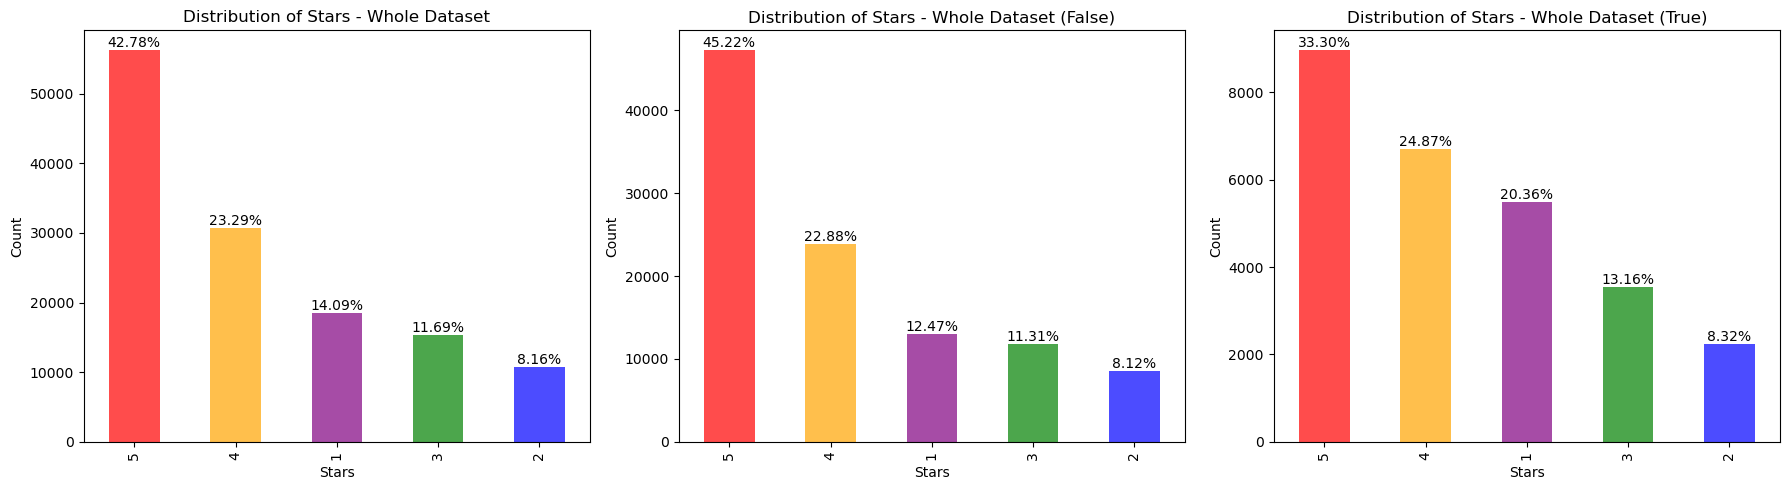


Merged Percentage DataFrame:


,Stars,Percentage (Whole Dataset),Percentage (False),Percentage (True)
0,5,42.8,45.2,33.3
1,4,23.3,22.9,24.9
2,1,14.1,12.5,20.4
3,3,11.7,11.3,13.2
4,2,8.2,8.1,8.3


In [56]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
stars_counts_whole_dataset = balanced_df_stars['stars'].value_counts()
colors_whole_dataset = ['red', 'orange', 'purple', 'green', 'blue']

stars_counts_whole_dataset.plot(kind='bar', color=colors_whole_dataset, alpha=0.7, label='Whole Dataset', ax=axs[0])
percentage_whole_dataset = stars_counts_whole_dataset / stars_counts_whole_dataset.sum() * 100
percentage_df_whole_dataset = pd.DataFrame({'Stars': percentage_whole_dataset.index,
                                            'Percentage (Whole Dataset)': percentage_whole_dataset.values})

for i, value in enumerate(stars_counts_whole_dataset):
    axs[0].text(i, value + 1, f'{percentage_whole_dataset.iloc[i]:.2f}%', ha='center', va='bottom')

axs[0].set_xlabel('Stars')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Stars - Whole Dataset')

stars_counts_whole_dataset_false = balanced_df_stars[balanced_df_stars['fake_review'] == False]['stars'].value_counts()
percentage_false_values = stars_counts_whole_dataset_false / stars_counts_whole_dataset_false.sum() * 100
percentage_df_false_values = pd.DataFrame({'Stars': percentage_false_values.index, 'Percentage (False)': percentage_false_values.values})
stars_counts_whole_dataset_false.plot(kind='bar', color=colors_whole_dataset, alpha=0.7, label='Whole Dataset (False)',ax=axs[1])

for i, value in enumerate(stars_counts_whole_dataset_false):
    axs[1].text(i, value + 1, f'{percentage_false_values.iloc[i]:.2f}%', ha='center', va='bottom')

axs[1].set_xlabel('Stars')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Stars - Whole Dataset (False)')

stars_counts_whole_dataset_true = balanced_df_stars[balanced_df_stars['fake_review'] == True]['stars'].value_counts()
percentage_true_values = stars_counts_whole_dataset_true / stars_counts_whole_dataset_true.sum() * 100
percentage_df_true_values = pd.DataFrame({'Stars': percentage_true_values.index,
                                          'Percentage (True)': percentage_true_values.values})
stars_counts_whole_dataset_true.plot(kind='bar', color=colors_whole_dataset, alpha=0.7,
                                     label='Whole Dataset (True)', ax=axs[2])

for i, value in enumerate(stars_counts_whole_dataset_true):
    axs[2].text(i, value + 1, f'{percentage_true_values.iloc[i]:.2f}%', ha='center', va='bottom')

axs[2].set_xlabel('Stars')
axs[2].set_ylabel('Count')
axs[2].set_title('Distribution of Stars - Whole Dataset (True)')
plt.tight_layout()
plt.show()

percentage_df_merged = pd.merge(percentage_df_whole_dataset, percentage_df_false_values, on='Stars')
percentage_df_merged = pd.merge(percentage_df_merged, percentage_df_true_values, on='Stars')
print("\nMerged Percentage DataFrame:")
percentage_df_merged.round(1)

In [57]:
print(balanced_df_stars['stars'].unique())

[5 3 4 1 2]


In [58]:
encoding_map = {1: 1, 2: 3, 3: 3, 4: 3, 5: 5}
balanced_df_stars['stars'] = balanced_df_stars['stars'].map(encoding_map)
print(balanced_df_stars['stars'].unique())

[5 3 1]


In [59]:
category_counts = balanced_df_stars['stars'].value_counts()
category_percentages = (category_counts / len(balanced_df_stars)) * 100
result_df = pd.DataFrame({'Category': category_percentages.index, 'Percentage': category_percentages.values})
result_df

,Category,Percentage
0,3,43.136033
1,5,42.778732
2,1,14.085235


In [60]:
balanced_df_stars['stars_label'] = balanced_df_stars['stars'].replace({1: 0, 3: 1, 5: 2})

In [61]:
balanced_df_stars.stars_label.unique()

array([2, 1, 0], dtype=int64)

In [62]:
stars_file_path = r'C:\DESKTOP INSIDE\Dissertation\datasets\balanced_df_stars_final.joblib'

joblib.dump(balanced_df_stars, stars_file_path)

['C:\\DESKTOP INSIDE\\Dissertation\\datasets\\balanced_df_stars_final.joblib']

In [63]:
stars_file_path = r'C:\DESKTOP INSIDE\Dissertation\datasets\balanced_df_stars_final.joblib'

balanced_df_stars = joblib.load(stars_file_path)

In [64]:
balanced_df_stars.head(3)

,business_id,stars,text,year,text_length,review_count,text_sentiment,fake_review,top_words_count,top_words_category,business_popularity,business_rating,rating_deviation_from_avg,length_sentiment_interaction,sentiment_business_rating,review_count_quartile,stars_label
358540,PaZLKfa3kV65LFhKrq-IIw,5,the people here are always super nice to me. i...,2016,127,1,0.555,False,1,0,1,5.00,0.00,70.48,2.78,0,2
64145,P7pxQFqr7yBKMMI2J51udw,3,Alcoholic milkshakes? Check. \n\nAlthough this...,2012,601,1,0.630,False,3,1,271,3.83,0.69,378.63,2.41,0,1
7772,WymLKyWx3t9V3VfI7itMtA,3,The place was packed when we showed up an we h...,2012,392,1,0.650,False,4,1,14,3.21,0.62,254.80,2.09,0,1


#### Feature Selection for both models


#### Fake Review Model

In [65]:
fake_reviews_balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   business_id                   100000 non-null  object 
 1   stars                         100000 non-null  int64  
 2   text                          100000 non-null  object 
 3   year                          100000 non-null  int64  
 4   text_length                   100000 non-null  int64  
 5   review_count                  100000 non-null  int64  
 6   text_sentiment                100000 non-null  float64
 7   fake_review                   100000 non-null  bool   
 8   top_words_count               100000 non-null  int64  
 9   top_words_category            100000 non-null  int32  
 10  business_popularity           100000 non-null  int64  
 11  business_rating               100000 non-null  float64
 12  rating_deviation_from_avg     100000 non-null

In [81]:
fake_reviews_balanced_df.corr()['fake_review'].sort_values(ascending=False)

fake_review                     1.000000
review_count_quartile           0.364601
review_count                    0.356693
rating_deviation_from_avg       0.033552
text_length                    -0.023819
text_sentiment                 -0.026629
length_sentiment_interaction   -0.041381
top_words_count                -0.042917
top_words_category             -0.044004
sentiment_business_rating      -0.048209
business_popularity            -0.058989
year                           -0.069679
business_rating                -0.106121
stars                          -0.126060
Name: fake_review, dtype: float64

<AxesSubplot:>

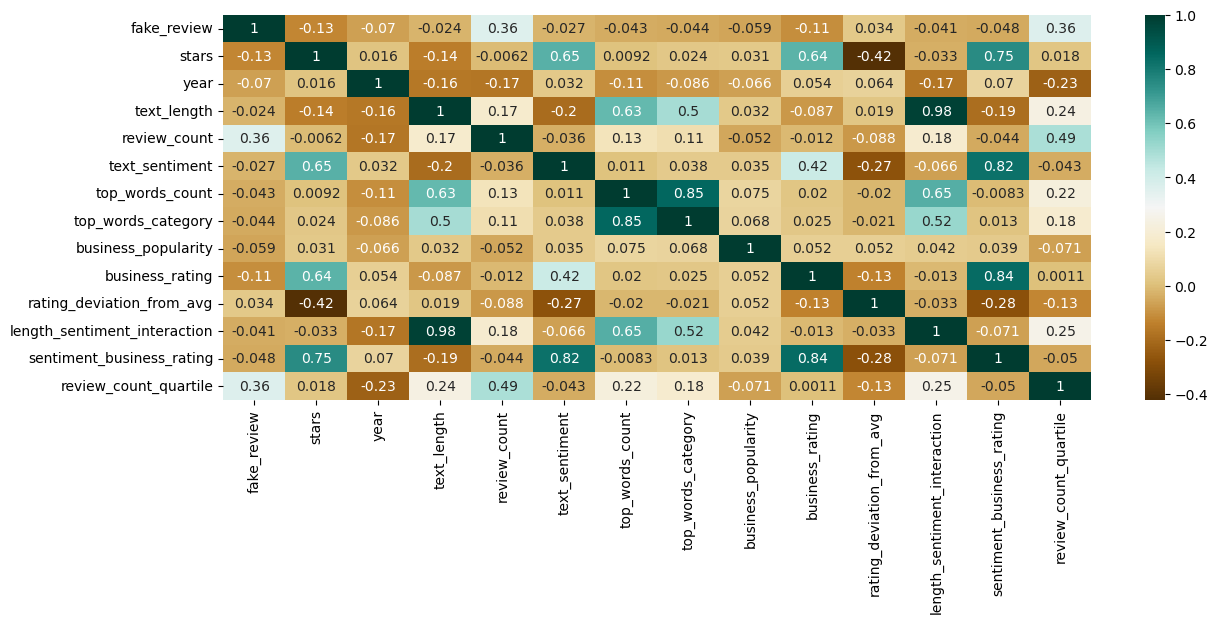

In [82]:
plt.figure(figsize=(14,5),dpi=100)
sns.heatmap(fake_reviews_balanced_df.corr(),annot=True, cmap='BrBG')

#### Actual Rating Model 

In [69]:
balanced_df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131542 entries, 358540 to 219098
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   business_id                   131542 non-null  object 
 1   stars                         131542 non-null  int64  
 2   text                          131542 non-null  object 
 3   year                          131542 non-null  int64  
 4   text_length                   131542 non-null  int64  
 5   review_count                  131542 non-null  int64  
 6   text_sentiment                131542 non-null  float64
 7   fake_review                   131542 non-null  bool   
 8   top_words_count               131542 non-null  int64  
 9   top_words_category            131542 non-null  int32  
 10  business_popularity           131542 non-null  int64  
 11  business_rating               131542 non-null  float64
 12  rating_deviation_from_avg     131542 no

In [73]:
columns_to_drop = ['stars']
balanced_df_stars = balanced_df_stars.drop(columns=columns_to_drop)
balanced_df_stars.head(3)

,business_id,text,year,text_length,review_count,text_sentiment,fake_review,top_words_count,top_words_category,business_popularity,business_rating,rating_deviation_from_avg,length_sentiment_interaction,sentiment_business_rating,review_count_quartile,stars_label
358540,PaZLKfa3kV65LFhKrq-IIw,the people here are always super nice to me. i...,2016,127,1,0.555,False,1,0,1,5.00,0.00,70.48,2.78,0,2
64145,P7pxQFqr7yBKMMI2J51udw,Alcoholic milkshakes? Check. \n\nAlthough this...,2012,601,1,0.630,False,3,1,271,3.83,0.69,378.63,2.41,0,1
7772,WymLKyWx3t9V3VfI7itMtA,The place was packed when we showed up an we h...,2012,392,1,0.650,False,4,1,14,3.21,0.62,254.80,2.09,0,1


In [77]:
balanced_df_stars.corr()['stars_label'].sort_values(ascending=False)

stars_label                     1.000000
sentiment_business_rating       0.686933
business_rating                 0.603085
text_sentiment                  0.558183
year                            0.057001
business_popularity             0.011744
top_words_category             -0.027693
review_count                   -0.043158
top_words_count                -0.045453
review_count_quartile          -0.049883
length_sentiment_interaction   -0.090544
fake_review                    -0.114690
text_length                    -0.178888
rating_deviation_from_avg      -0.330134
Name: stars_label, dtype: float64

<AxesSubplot:>

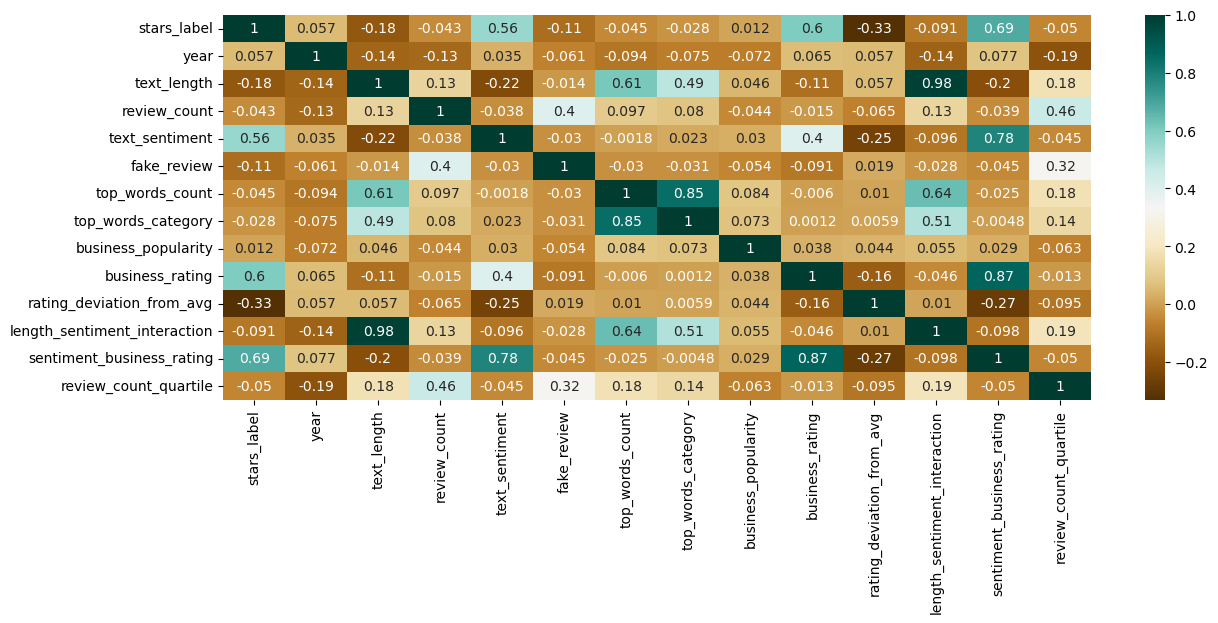

In [78]:
plt.figure(figsize=(14,5),dpi=100)
sns.heatmap(balanced_df_stars.corr(),annot=True, cmap='BrBG')

#### Modeling

In [96]:
rf_params= {"n_estimators": [ 100, 200],
        "max_depth": [2, 4, 8],
        "min_samples_split": [2, 4, 8],
        "min_samples_leaf": [ 2, 4],}

gbc_params= {"n_estimators": [ 100, 200],
        "learning_rate": [0.1, 1],
        "max_depth": [2, 4, 8],
        "min_samples_split": [2, 4,6],
        "min_samples_leaf": [ 2, 4],
        "subsample": [1, 0.5],} 

abc_params= {"n_estimators": [ 50,100, 200],"learning_rate": [0.1, 1, 10],}

knc_params= {"n_neighbors": [3, 5, 7, 9],"weights": ["uniform", "distance"],"p": [1, 2, 3, 4],}

xgbc_params= {"n_estimators": [ 100, 200],
        "learning_rate": [0.1, 1, 10],
        "max_depth": [2, 4, 6],
        "min_child_weight": [1, 2, 3],
        "subsample": [1, 0.5, 0.1],}

mlp_params= {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],}

log_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]}

In [97]:
models_fake = {
    'AdaBoostClassifier': (AdaBoostClassifier(), abc_params),
    'RandomForestClassifier': (RandomForestClassifier(), rf_params),
    'XGBClassifier': (XGBClassifier(), xgbc_params),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), gbc_params),
    'KNeighborsClassifier': (KNeighborsClassifier(), knc_params),
    'Multilayer Perceptron': (MLPClassifier(), mlp_params),
    'LogisticRegression': (LogisticRegression(),log_params),
}

In [99]:
vocab_fake = CountVectorizer(analyzer=preprocess_text)
X_text_vectorized = vocab_fake.fit_transform(fake_reviews_balanced_df['text'])
X_additional_features_fake_review = csr_matrix(fake_reviews_balanced_df[['review_count_quartile', 'rating_deviation_from_avg', 
            'stars','business_rating','year','business_popularity', 'top_words_category','sentiment_business_rating']].values)

X_combined_fake_review = hstack([X_text_vectorized, X_additional_features_fake_review])
y_fake_review = fake_reviews_balanced_df['fake_review']

In [82]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_combined_fake_review, y_fake_review,
                                                            test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

results_df_fake = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy',
                                        'Train F1 Score', 'Validation F1 Score', 'Test F1 Score',
                                        'Train Precision', 'Validation Precision', 'Test Precision',
                                        'Train Recall', 'Validation Recall', 'Test Recall',
                                        'Best Parameters'])
model_counter_fake = 1
for name, (model, params) in models_fake.items():
    try:
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_f1 = round(f1_score(y_train, y_train_pred, average='weighted'), 3)
        train_precision = round(precision_score(y_train, y_train_pred), 3)
        train_recall = round(recall_score(y_train, y_train_pred), 3)
        train_accuracy = round(accuracy_score(y_train, y_train_pred), 3)

        grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
        grid.fit(X_val, y_val)
        
        best_model_fake = grid.best_estimator_
        best_params_fake = grid.best_params_

        y_val_pred = best_model_fake.predict(X_val)
        val_f1 = round(f1_score(y_val, y_val_pred, average='weighted'), 3)
        val_precision = round(precision_score(y_val, y_val_pred), 3)
        val_recall = round(recall_score(y_val, y_val_pred), 3)
        val_accuracy = round(accuracy_score(y_val, y_val_pred), 3)

        y_test_pred = best_model_fake.predict(X_test)
        test_f1 = round(f1_score(y_test, y_test_pred, average='weighted'), 3)
        test_precision = round(precision_score(y_test, y_test_pred), 3)
        test_recall = round(recall_score(y_test, y_test_pred), 3)
        test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)

        results_df_fake = results_df_fake.append({
            'Model': name,
            'Train Accuracy': train_accuracy,
            'Validation Accuracy': val_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1 Score': train_f1,
            'Validation F1 Score': val_f1,
            'Test F1 Score': test_f1,
            'Train Precision': train_precision,
            'Validation Precision': val_precision,
            'Test Precision': test_precision,
            'Train Recall': train_recall,
            'Validation Recall': val_recall,
            'Test Recall': test_recall,
            'Best Parameters': best_params_fake,
        }, ignore_index=True)
        
        joblib.dump(best_model_fake, f'fake_best_model_{name}_{model_counter_fake}.joblib')
        model_counter_fake += 1

        print(f'Model: {name}')
        print('-' * 50)
        print('Train Results:')
        print(f'Accuracy: {train_accuracy}')
        print(f'F1 Score: {train_f1}')
        print(f'Train Precision: {train_precision}')
        print(f'Train Recall : {train_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_train, y_train_pred))
        print('Classification Report:')
        print(classification_report(y_train, y_train_pred))
        print('-' * 50)
        print('Validation Results:')
        print(f'Accuracy: {val_accuracy}')
        print(f'F1 Score: {val_f1}')
        print(f'Validation Precision: {val_precision}')
        print(f'Validation Recall: {val_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_val, y_val_pred))
        print('Classification Report:')
        print(classification_report(y_val, y_val_pred))
        print('-' * 50)
        print('Test Results:')
        print(f'Accuracy: {test_accuracy}')
        print(f'F1 Score: {test_f1}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_test_pred))
        print('Classification Report:')
        print(classification_report(y_test, y_test_pred))
        print('-' * 50)
        print('Best Parameters:')
        print(best_params_fake)
        print('-' * 110)
        print('-' * 110)
        
    except Exception as e:
        print(f"An error occurred for {name}: {e}")

results_df_fake.index += 1
print('\nResults DataFrame:')
print(results_df_fake)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: AdaBoostClassifier
--------------------------------------------------
Train Results:
Accuracy: 0.827
F1 Score: 0.827
Train Precision: 0.788
Train Recall : 0.779
Confusion Matrix:
[[32960  5374]
 [ 5684 19982]]
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.86      0.86     38334
        True       0.79      0.78      0.78     25666

    accuracy                           0.83     64000
   macro avg       0.82      0.82      0.82     64000
weighted avg       0.83      0.83      0.83     64000

--------------------------------------------------
Validation Results:
Accuracy: 0.836
F1 Score: 0.836
Validation Precision: 0.791
Validation Recall: 0.803
Confusion Matrix:
[[8223 1360]
 [1261 5156]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.86      0.86      9583
        True       0.79      0.80      0

In [83]:
results_df_fake

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train F1 Score,Validation F1 Score,Test F1 Score,Train Precision,Validation Precision,Test Precision,Train Recall,Validation Recall,Test Recall,Best Parameters
1,AdaBoostClassifier,0.827,0.836,0.829,0.827,0.836,0.829,0.788,0.791,0.785,0.779,0.803,0.781,"{'learning_rate': 1, 'n_estimators': 50}"
2,RandomForestClassifier,1.000,0.780,0.745,1.000,0.769,0.731,1.000,0.835,0.771,1.000,0.563,0.505,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s..."
3,XGBClassifier,0.942,0.958,0.900,0.943,0.959,0.901,0.882,0.911,0.827,0.987,0.993,0.944,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch..."
4,GradientBoostingClassifier,0.880,1.000,0.897,0.881,1.000,0.898,0.806,0.999,0.826,0.923,1.000,0.937,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa..."
5,KNeighborsClassifier,0.738,0.726,0.637,0.732,0.718,0.625,0.715,0.707,0.556,0.576,0.542,0.416,"{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}"
6,Multilayer Perceptron,0.800,0.789,0.794,0.790,0.790,0.795,0.873,0.721,0.726,0.586,0.774,0.770,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_..."
7,LogisticRegression,0.683,0.707,0.711,0.672,0.701,0.704,0.640,0.667,0.669,0.478,0.539,0.537,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', ..."


In [72]:
models_stars = {
    'AdaBoostClassifier': (AdaBoostClassifier(), abc_params),
    'RandomForestClassifier': (RandomForestClassifier(), rf_params),
    'XGBClassifier': (XGBClassifier(), xgbc_params),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), gbc_params),
    'KNeighborsClassifier': (KNeighborsClassifier(), knc_params),
    'Multilayer Perceptron': (MLPClassifier(), mlp_params),
    'LogisticRegression': (LogisticRegression(),log_params),
}

In [73]:
vocab_stars = CountVectorizer(analyzer=preprocess_text)
X_text_vectorized_stars = vocab_stars.fit_transform(balanced_df_stars['text'])
X_additional_features_stars = csr_matrix(balanced_df_stars[['sentiment_business_rating', 'text_sentiment','top_words_count',
                                            'rating_deviation_from_avg', 'length_sentiment_interaction', 'year']].values)

X_combined_stars = hstack([X_text_vectorized_stars, X_additional_features_stars])
y_stars = balanced_df_stars['stars_label']

In [86]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_combined_stars, y_stars, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

results_df_stars = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy',
                                        'Train F1 Score', 'Validation F1 Score', 'Test F1 Score',
                                        'Train Precision', 'Validation Precision', 'Test Precision',
                                        'Train Recall', 'Validation Recall', 'Test Recall',
                                        'Best Parameters'])
model_counter_stars = 1
for name, (model, params) in models_stars.items():
    try:
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_f1 = round(f1_score(y_train, y_train_pred, average='weighted'), 3)
        train_precision = round(precision_score(y_train, y_train_pred, average='weighted'), 3)
        train_recall = round(recall_score(y_train, y_train_pred, average='weighted'), 3)
        train_accuracy = round(accuracy_score(y_train, y_train_pred), 3)


        grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
        grid.fit(X_val, y_val)
        
        best_model_stars = grid.best_estimator_
        best_params_stars = grid.best_params_

        y_val_pred = best_model_stars.predict(X_val)
        val_f1 = round(f1_score(y_val, y_val_pred, average='weighted'), 3)
        val_precision = round(precision_score(y_val, y_val_pred, average='weighted'), 3)
        val_recall = round(recall_score(y_val, y_val_pred, average='weighted'), 3)
        val_accuracy = round(accuracy_score(y_val, y_val_pred), 3)


        y_test_pred = best_model_stars.predict(X_test)
        test_f1 = round(f1_score(y_test, y_test_pred, average='weighted'), 3)
        test_precision = round(precision_score(y_test, y_test_pred, average='weighted'), 3)
        test_recall = round(recall_score(y_test, y_test_pred, average='weighted'), 3)
        test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)

        results_df_stars = results_df_stars.append({
            'Model': name,
            'Train Accuracy': train_accuracy,
            'Validation Accuracy': val_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1 Score': train_f1,
            'Validation F1 Score': val_f1,
            'Test F1 Score': test_f1,
            'Train Precision': train_precision,
            'Validation Precision': val_precision,
            'Test Precision': test_precision,
            'Train Recall': train_recall,
            'Validation Recall': val_recall,
            'Test Recall': test_recall,
            'Best Parameters': best_params_stars,
        }, ignore_index=True)
        
        joblib.dump(best_model_stars, f'stars_best_model_{name}_{model_counter_stars}.joblib')
        model_counter_stars += 1

        print(f'Model: {name}')
        print('-' * 50)
        print('Train Results:')
        print(f'Accuracy: {train_accuracy}')
        print(f'F1 Score: {train_f1}')
        print(f'Train Precision: {train_precision}')
        print(f'Train Recall : {train_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_train, y_train_pred))
        print('Classification Report:')
        print(classification_report(y_train, y_train_pred))
        print('-' * 50)
        print('Validation Results:')
        print(f'Accuracy: {val_accuracy}')
        print(f'F1 Score: {val_f1}')
        print(f'Validation Precision: {val_precision}')
        print(f'Validation Recall: {val_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_val, y_val_pred))
        print('Classification Report:')
        print(classification_report(y_val, y_val_pred))
        print('-' * 50)
        print('Test Results:')
        print(f'Accuracy: {test_accuracy}')
        print(f'F1 Score: {test_f1}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_test_pred))
        print('Classification Report:')
        print(classification_report(y_test, y_test_pred))
        print('-' * 50)
        print('Best Parameters:')
        print(best_params_stars)
        print('-' * 110)
        print('-' * 110)
        
    except Exception as e:
        print(f"An error occurred for {name}: {e}")

results_df_stars.index += 1
print('\nResults DataFrame:')
print(results_df_stars)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: AdaBoostClassifier
--------------------------------------------------
Train Results:
Accuracy: 0.675
F1 Score: 0.666
Train Precision: 0.698
Train Recall : 0.675
Confusion Matrix:
[[ 8077  1984  1828]
 [  751 31160  4377]
 [  944 17485 17580]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     11889
           1       0.62      0.86      0.72     36288
           2       0.74      0.49      0.59     36009

    accuracy                           0.67     84186
   macro avg       0.73      0.68      0.68     84186
weighted avg       0.70      0.67      0.67     84186

--------------------------------------------------
Validation Results:
Accuracy: 0.732
F1 Score: 0.729
Validation Precision: 0.742
Validation Recall: 0.732
Confusion Matrix:
[[2208  392  384]
 [ 173 7742 1276]
 [ 193 3232 5447]]
Classification Report:
              precision    recall 

In [87]:
results_df_stars

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train F1 Score,Validation F1 Score,Test F1 Score,Train Precision,Validation Precision,Test Precision,Train Recall,Validation Recall,Test Recall,Best Parameters
1,AdaBoostClassifier,0.675,0.732,0.728,0.666,0.729,0.725,0.698,0.742,0.742,0.675,0.732,0.728,"{'learning_rate': 0.1, 'n_estimators': 100}"
2,RandomForestClassifier,1.000,0.696,0.665,1.000,0.684,0.650,1.000,0.724,0.695,1.000,0.696,0.665,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s..."
3,XGBClassifier,0.976,1.000,0.937,0.976,1.000,0.937,0.977,1.000,0.938,0.976,1.000,0.937,"{'learning_rate': 1, 'max_depth': 6, 'min_chil..."
4,GradientBoostingClassifier,0.898,1.000,0.951,0.898,1.000,0.951,0.900,1.000,0.951,0.898,1.000,0.951,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa..."
5,KNeighborsClassifier,0.701,0.670,0.574,0.700,0.666,0.569,0.703,0.678,0.581,0.701,0.670,0.574,"{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}"
6,Multilayer Perceptron,0.828,0.828,0.824,0.825,0.826,0.822,0.848,0.838,0.831,0.828,0.828,0.824,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
7,LogisticRegression,0.626,0.778,0.774,0.623,0.778,0.774,0.629,0.779,0.774,0.626,0.778,0.774,"{'C': 10, 'max_iter': 300, 'penalty': 'l1', 's..."


#### Evaluation of the fake models

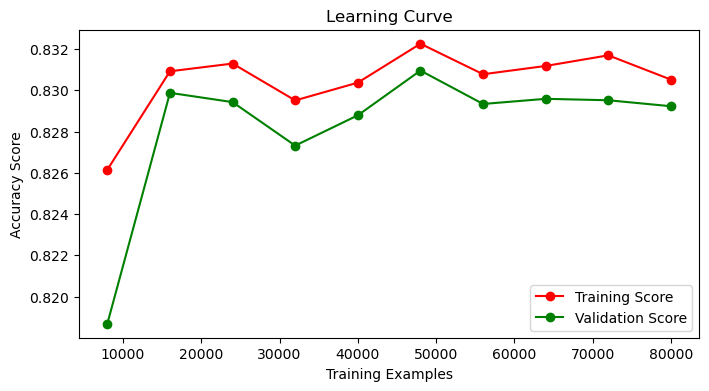

In [94]:
chosen_model_name_fake = 'AdaBoostClassifier'
model_counter_fake = 1

try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")


train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

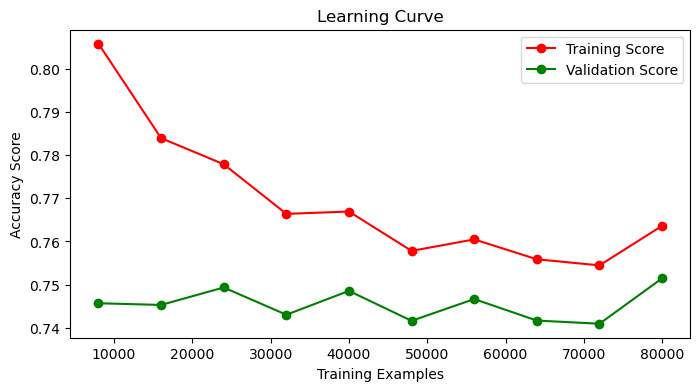

In [96]:
chosen_model_name_fake = 'RandomForestClassifier'
model_counter_fake = 2

try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

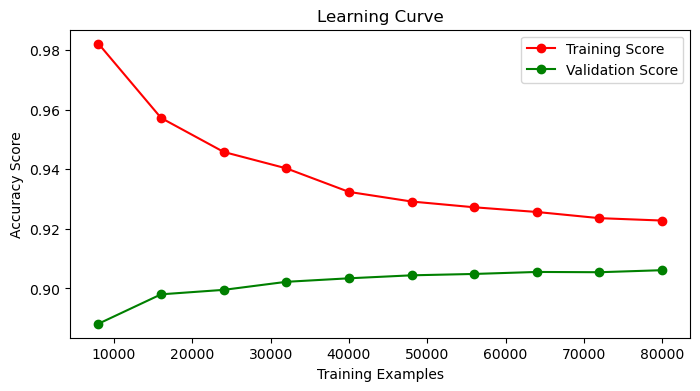

In [98]:
chosen_model_name_fake = 'XGBClassifier'
model_counter_fake = 3
try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

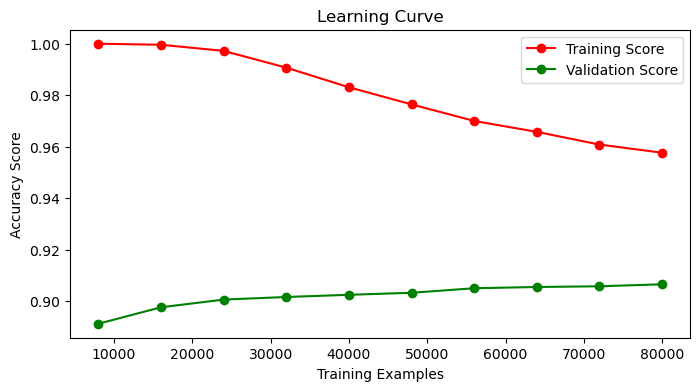

In [76]:
chosen_model_name_fake = 'GradientBoostingClassifier'
model_counter_fake = 4
try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

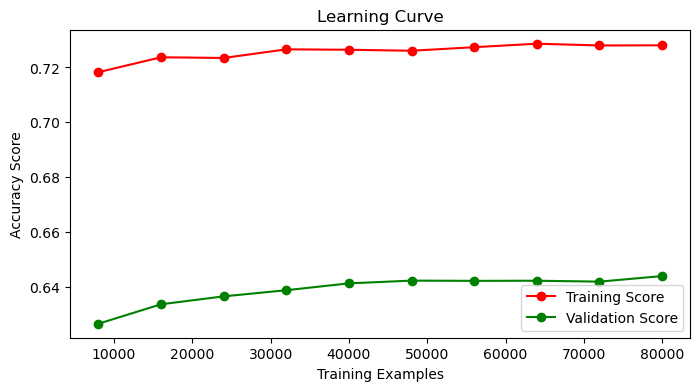

In [78]:
chosen_model_name_fake = 'KNeighborsClassifier'
model_counter_fake = 5

try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

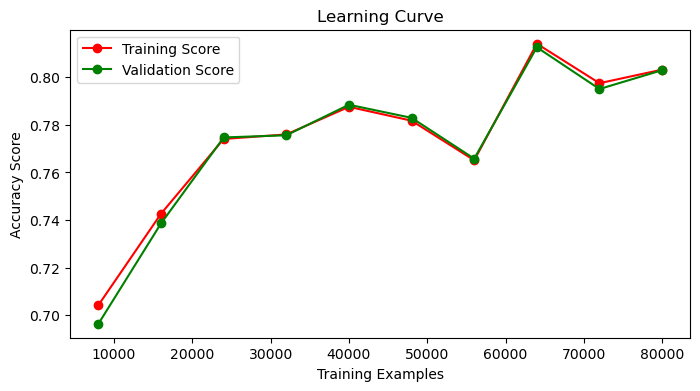

In [80]:
chosen_model_name_fake = 'Multilayer Perceptron'
model_counter_fake = 6
try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

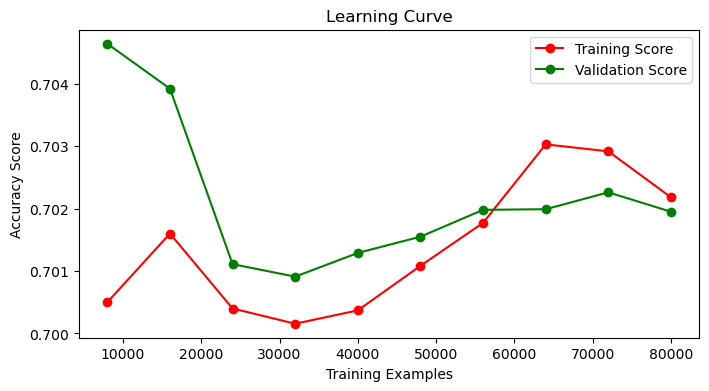

In [82]:
chosen_model_name_fake = 'LogisticRegression'
model_counter_fake = 7

try:
    loaded_model_fake = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_fake, X_combined_fake_review, y_fake_review, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

AdaBoost Metrics:
              precision    recall  f1-score   support

       False       0.85      0.86      0.86     12083
        True       0.78      0.77      0.78      7917

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



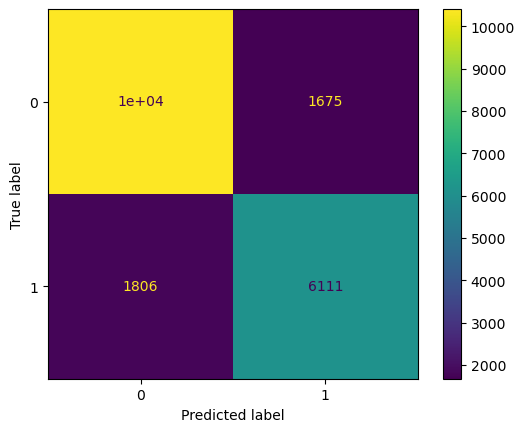

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

chosen_model_name_fake = 'AdaBoostClassifier'
model_counter_fake = 1

try:
    ada_model = joblib.load(f'fake_best_model_{chosen_model_name_fake}_{model_counter_fake}.joblib')
except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_fake}: {e}")

ada_model.fit(X_train, y_train)  
y_pred_adaboost = ada_model.predict(X_test)
print("AdaBoost Metrics:")
print(classification_report(y_test, y_pred_adaboost))
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cm_display_adaboost = ConfusionMatrixDisplay(cm_adaboost)
cm_display_adaboost.plot()

#### Evaluation of the Actual rating models

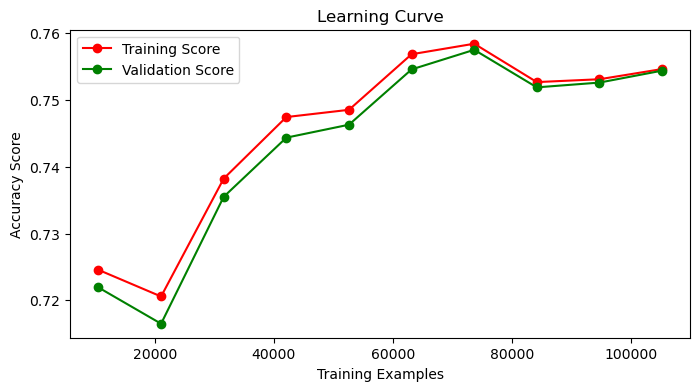

In [87]:
chosen_model_name_stars = 'AdaBoostClassifier'
model_counter_stars = 1
try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

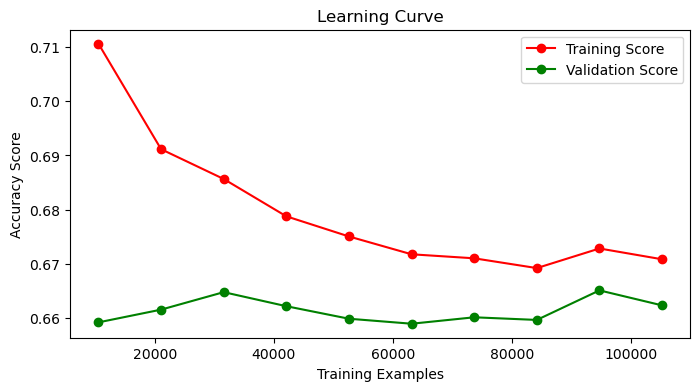

In [89]:
chosen_model_name_stars = 'RandomForestClassifier'
model_counter_stars = 2
try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

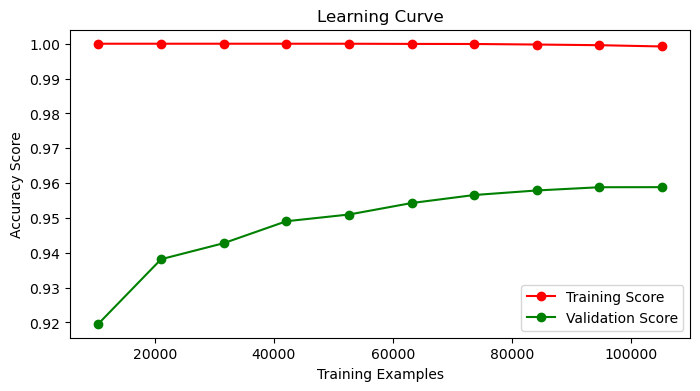

In [91]:
chosen_model_name_stars = 'XGBClassifier'
model_counter_stars = 3
try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")


train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

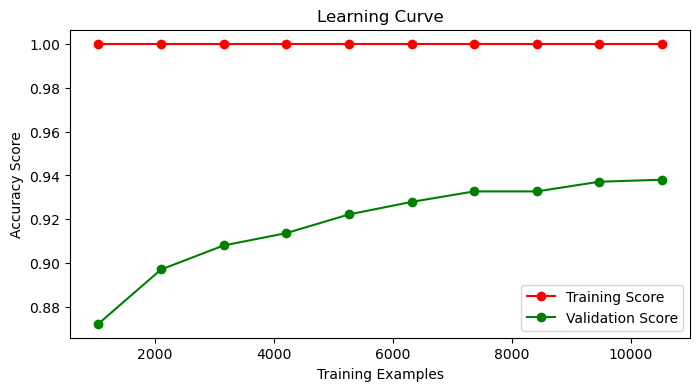

In [79]:
chosen_model_name_stars = 'GradientBoostingClassifier'
model_counter_stars = 4
try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")


train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


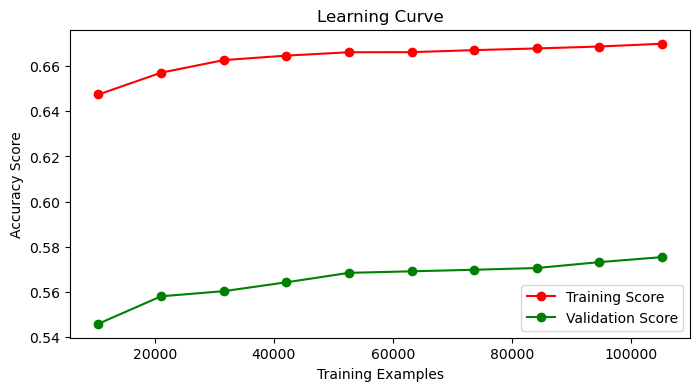

In [94]:
chosen_model_name_stars = 'KNeighborsClassifier'
model_counter_stars = 5
try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")

train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

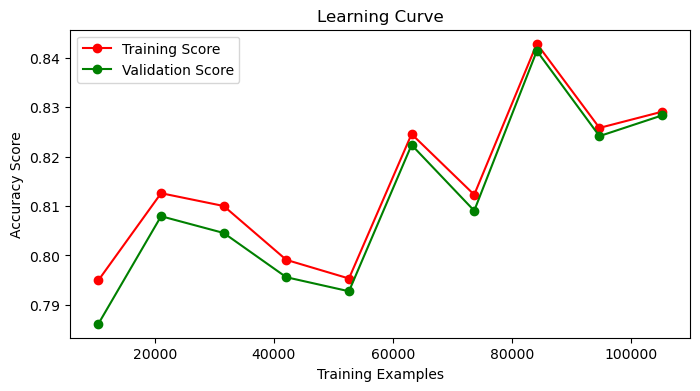

In [96]:
chosen_model_name_stars = 'Multilayer Perceptron'
model_counter_stars = 6

try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")


train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

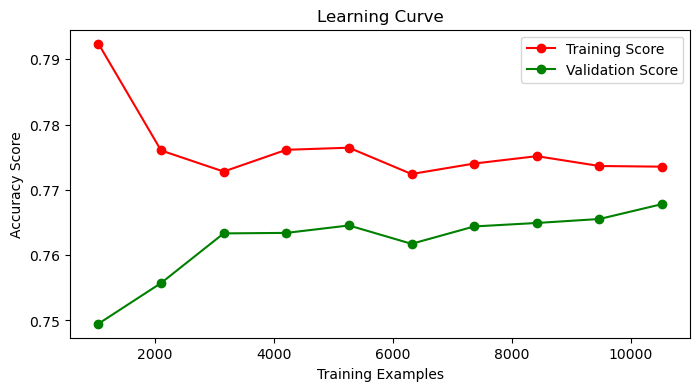

In [81]:
chosen_model_name_stars = 'LogisticRegression' 
model_counter_stars = 7

try:
    loaded_model_stars = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')

except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")
    
train_sizes, train_scores, val_scores = learning_curve(loaded_model_stars, X_combined_stars, y_stars, 
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='red', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

Multilayer Perceptron Metrics:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     18528
           1       0.89      0.72      0.80     56742
           2       0.78      0.89      0.83     56272

    accuracy                           0.82    131542
   macro avg       0.83      0.85      0.83    131542
weighted avg       0.83      0.82      0.82    131542



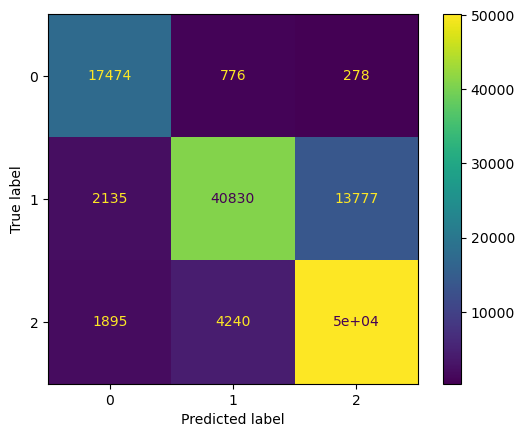

In [108]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

chosen_model_name_stars = 'Multilayer Perceptron'
model_counter_stars = 6
try:
    mlp_model = joblib.load(f'stars_best_model_{chosen_model_name_stars}_{model_counter_stars}.joblib')
except Exception as e:
    print(f"An error occurred while loading {chosen_model_name_stars}: {e}")

X_text_vectorized_test = vocab_stars.transform(balanced_df_stars['text'])
X_additional_features_test = csr_matrix(balanced_df_stars[['sentiment_business_rating', 'text_sentiment',
                                                         'top_words_count', 'rating_deviation_from_avg',
                                                         'length_sentiment_interaction', 'year']].values)

X_combined_test = hstack([X_text_vectorized_test, X_additional_features_test])
y_test = balanced_df_stars['stars_label']
assert X_combined_test.shape[1] == mlp_model.coefs_[0].shape[0], 
y_pred_test = mlp_model.predict(X_combined_test)
print("Multilayer Perceptron Metrics:")
print(classification_report(y_test, y_pred_test))
cm_mlp = confusion_matrix(y_test, y_pred_test)
cm_display_mlp = ConfusionMatrixDisplay(cm_mlp)
cm_display_mlp.plot()

### Hypothesis tests

#### Hypothesis 2: Fake reviews distort perceived product or service quality.

##### Null Hypothesis (H0): Fake reviews have no effect on the perceived product or service quality.

##### Alternative Hypothesis (H1): Fake reviews distort the perceived product or service quality.

#### Checking Normality

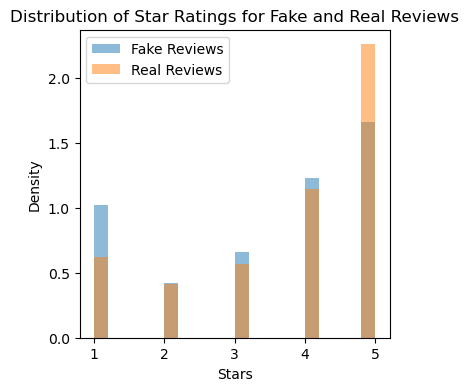

Shapiro-Wilk Test - Fake Reviews: Statistic=0.8250130414962769, p-value=0.0
Shapiro-Wilk Test - Real Reviews: Statistic=0.7820737361907959, p-value=0.0


In [95]:
df_hyp = df.copy()

plt.figure(figsize=(4, 4))
plt.hist(df_hyp[df_hyp['fake_review'] == True]['stars'], alpha=0.5, label='Fake Reviews', bins=20, density=True)
plt.hist(df_hyp[df_hyp['fake_review'] == False]['stars'], alpha=0.5, label='Real Reviews', bins=20, density=True)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.title('Distribution of Star Ratings for Fake and Real Reviews')
plt.legend()
plt.show()

stat_fake, p_value_fake = shapiro(df_hyp[df_hyp['fake_review'] == True]['stars'])
stat_real, p_value_real = shapiro(df_hyp[df_hyp['fake_review'] == False]['stars'])

print(f'Shapiro-Wilk Test - Fake Reviews: Statistic={stat_fake}, p-value={p_value_fake}')
print(f'Shapiro-Wilk Test - Real Reviews: Statistic={stat_real}, p-value={p_value_real}')

#### Data Transformation and Further Analysis

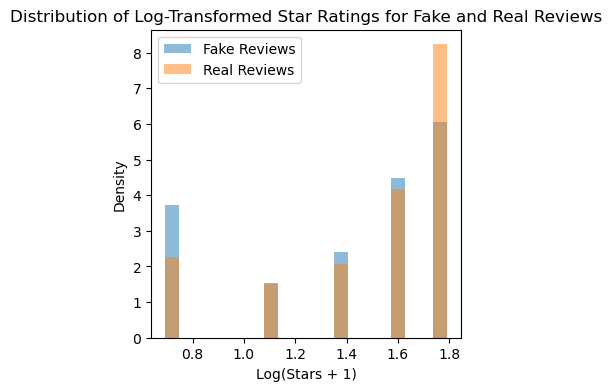

Shapiro-Wilk Test - Fake Reviews (Log-Transformed): Statistic=0.7827951908111572, p-value=0.0
Shapiro-Wilk Test - Real Reviews (Log-Transformed): Statistic=0.7350908517837524, p-value=0.0
T-Test (Log-Transformed): t-statistic=-77.51876767696983, p-value=0.0


In [94]:
df_hyp['stars_log'] = np.log(df_hyp['stars'] + 1)

plt.figure(figsize=(4, 4))
plt.hist(df_hyp[df_hyp['fake_review'] == True]['stars_log'], alpha=0.5, label='Fake Reviews', bins=20, density=True)
plt.hist(df_hyp[df_hyp['fake_review'] == False]['stars_log'], alpha=0.5, label='Real Reviews', bins=20, density=True)
plt.xlabel('Log(Stars + 1)')
plt.ylabel('Density')
plt.title('Distribution of Log-Transformed Star Ratings for Fake and Real Reviews')
plt.legend()
plt.show()

stat_fake_log, p_value_fake_log = shapiro(df_hyp[df_hyp['fake_review'] == True]['stars_log'])
stat_real_log, p_value_real_log = shapiro(df_hyp[df_hyp['fake_review'] == False]['stars_log'])

print(f'Shapiro-Wilk Test - Fake Reviews (Log-Transformed): Statistic={stat_fake_log}, p-value={p_value_fake_log}')
print(f'Shapiro-Wilk Test - Real Reviews (Log-Transformed): Statistic={stat_real_log}, p-value={p_value_real_log}')

t_stat_log, t_p_value_log = ttest_ind(df_hyp[df_hyp['fake_review'] == True]['stars_log'],
                                       df_hyp[df_hyp['fake_review'] == False]['stars_log'])

print(f'T-Test (Log-Transformed): t-statistic={t_stat_log}, p-value={t_p_value_log}')

#### Non-Parametric Test (Mann-Whitney U Test)

In [88]:
u_stat, mw_p_value = mannwhitneyu(df_hyp[df_hyp['fake_review'] == True]['stars'],
                                   df_hyp[df_hyp['fake_review'] == False]['stars'])

print(f'Mann-Whitney U Test: U-statistic={u_stat}, p-value={mw_p_value}')

alpha = 0.05

if mw_p_value < alpha:
    print('Reject the null hypothesis. There is significant evidence that fake reviews distort perceived product or service quality.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence that fake reviews distort perceived product or service quality.')

Mann-Whitney U Test: U-statistic=19063449225.5, p-value=0.0
Reject the null hypothesis. There is significant evidence that fake reviews distort perceived product or service quality.


#### Hypothesis 3: There is a significant correlation between the star rating assigned to reviews and the overall business rating.

##### Null Hypothesis (H0): There is no correlation between the star rating assigned to reviews and the overall business rating.

##### Alternative Hypothesis (H1): There is a significant correlation between the star rating assigned to reviews and the overall business rating.

In [91]:
reviews_rating = df['stars']
business_rating = df['business_rating']

corr_coefficient, p_value = pearsonr(reviews_rating, business_rating)
print(f'Pearson Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis. The correlation is statistically significant.')
    if corr_coefficient > 0:
        print('There is a positive correlation between star rating and overall business rating.')
    elif corr_coefficient < 0:
        print('There is a negative correlation between star rating and overall business rating.')
    else:
        print('There is no linear correlation between star rating and overall business rating.')
else:
    print('Fail to reject the null hypothesis. The correlation is not statistically significant.')


Pearson Correlation Coefficient: 0.63159679875174
P-value: 0.0
Reject the null hypothesis. The correlation is statistically significant.
There is a positive correlation between star rating and overall business rating.


#### Hypothesis 4: The star rating of reviews is positively correlated with the popularity of businesses.

#### Null Hypothesis (H0): There is no correlation between the star rating of reviews and the popularity of businesses.

#### Alternative Hypothesis (H1): The star rating of reviews is positively correlated with the popularity of businesses.

In [92]:
stars = df['stars']
business_popularity = df['business_popularity']

corr_coefficient, p_value = pearsonr(stars, business_popularity)
print(f'Pearson Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis. The correlation is statistically significant.')
    if corr_coefficient > 0:
        print('There is a positive correlation between star rating and business popularity.')
    elif corr_coefficient < 0:
        print('There is a negative correlation between star rating and business popularity.')
    else:
        print('There is no linear correlation between star rating and business popularity.')
else:
    print('Fail to reject the null hypothesis. The correlation is not statistically significant.')


Pearson Correlation Coefficient: 0.022083020706617305
P-value: 9.211881241884445e-58
Reject the null hypothesis. The correlation is statistically significant.
There is a positive correlation between star rating and business popularity.
